In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install -q tensorflow==2.0.0-beta1
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The original size of train data is so big, 55423856, it has about 55M rows<br>
Only 10% of the samples are imported for this exercise <br>
And then it will be divided into train_s and test_s data set for your modeling.

In [2]:
train_original = './train.csv'
df = pd.read_csv(train_original, index_col=0)
df = df.sample(frac=0.1, replace=True, random_state=1)
print('The size of train data =', df.shape)

The size of train data = (5542386, 7)


In [3]:
# Now, let's divide it into train, test (10% of size of train)
train = df.sample(frac=0.9, random_state=2)
test = df.drop(train.index)

In [4]:
# Remove NaN 
print(test.shape)
test = test.dropna(how = 'any')
print(test.shape)

(506503, 7)
(506497, 7)


In [5]:
test.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,506497.000000,506497.000000,506497.000000,506497.000000,506497.000000,506497.000000
mean,11.339383,-72.486084,39.911749,-72.490447,39.905778,1.683046
std,9.762299,12.954916,10.037512,12.173096,10.212929,1.337888
min,-52.000000,-3325.981737,-3110.304580,-3325.981737,-3116.318955,0.000000
25%,6.000000,-73.992054,40.734932,-73.991402,40.734023,1.000000
50%,8.500000,-73.981796,40.752665,-73.980195,40.753115,1.000000
75%,12.500000,-73.967062,40.767153,-73.963757,40.768084,2.000000
max,356.000000,2469.179042,2892.864787,2119.671525,2532.172577,208.000000


**Drop data which is out of Area of original test data** <br>
lon_min, lon_max, lat_min, lat_max = (-74.263242 -72.990963 40.568973 41.696683)

In [6]:
lon_min, lon_max, lat_min, lat_max = (-74.263242, -72.990963, 40.568973, 41.696683)

In [7]:
test = \
    test[(test.pickup_longitude >= lon_min) & (test.pickup_longitude <= lon_max) &
    (test.dropoff_longitude >= lon_min) & (test.dropoff_longitude <= lon_max) &
    (test.pickup_latitude >= lat_min) & (test.pickup_latitude <= lat_max) &
    (test.dropoff_latitude >= lat_min) & (test.dropoff_latitude <= lat_max)]

print(test.shape)

(495446, 7)


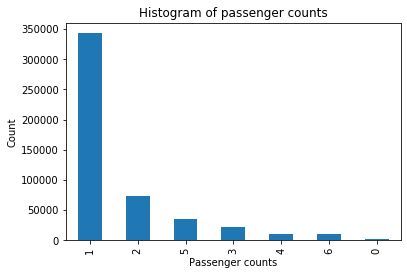

In [8]:
test['passenger_count'].value_counts().plot.bar();
plt.title('Histogram of passenger counts'); plt.xlabel('Passenger counts'); plt.ylabel('Count');

In [9]:
test.groupby('passenger_count').size()

passenger_count
0      1768
1    343016
2     73053
3     21658
4     10684
5     34952
6     10315
dtype: int64

Let's remove passenger_count 0 data as there is no data like this in original test set

In [10]:
test = test[test.passenger_count > 0]

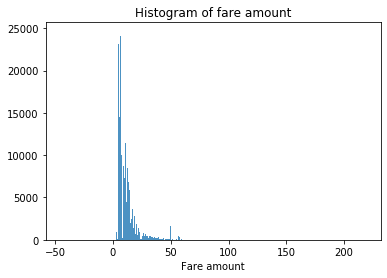

In [11]:
# fare_amount
plt.hist(test.fare_amount, 1000, alpha=0.8)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.show();

In [12]:
# Let's remove fare_amount lower than basic fare 2.5$
test = test[test.fare_amount >= 2.5]

In [13]:
print('the size of test=', test.shape)
test.describe()

the size of test= (493647, 7)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,493647.000000,493647.000000,493647.000000,493647.000000,493647.000000,493647.000000
mean,11.317944,-73.975116,40.751118,-73.974371,40.751465,1.688300
std,9.597547,0.038448,0.029516,0.037402,0.032704,1.303675
min,2.500000,-74.260653,40.570152,-74.258545,40.569730,1.000000
25%,6.000000,-73.992270,40.736595,-73.991594,40.735594,1.000000
50%,8.500000,-73.982098,40.753420,-73.980644,40.753830,1.000000
75%,12.500000,-73.968300,40.767581,-73.965452,40.768390,2.000000
max,218.330000,-72.997301,41.508675,-73.021558,41.589828,6.000000


### Save it to train_s.csv and test_s.csv

In [14]:
train.to_csv('./train_s.csv')
test.to_csv('./test_s.csv')